Opening up a .nc file to see what it looks like

In [1]:
import netCDF4
import numpy as np
import os
from ipywidgets import interact,widgets,fixed
import matplotlib.pyplot as plt

In [2]:
data = netCDF4.Dataset('../data/train/data-1996-06-09-01-1_0.nc')

In [3]:
data.variables.keys()

dict_keys(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS', 'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT', 'time', 'LABELS'])

In [4]:
data.variables['LABELS']

<class 'netCDF4._netCDF4.Variable'>
int64 LABELS(lat, lon)
    description: 0: Background, 1: Tropical Cyclone, 2: Athmospheric river
unlimited dimensions: 
current shape = (768, 1152)
filling on, default _FillValue of -9223372036854775806 used

In [5]:
np.array(data.variables['LABELS'])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
np.unique(np.array(data.variables['LABELS']), return_counts=True)

(array([0, 1, 2]), array([817294,   3750,  63692]))

each plot below is a visualization for an array that contains some weather measurements (ex: TREFHT = Surface Air Temperature at Reference Height)

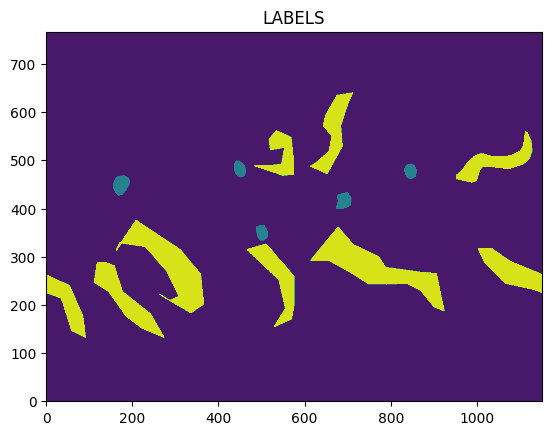

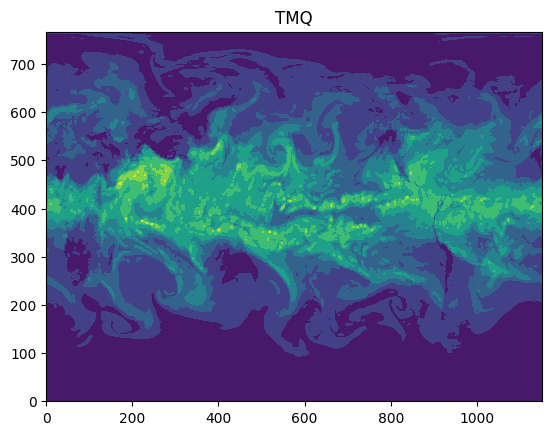

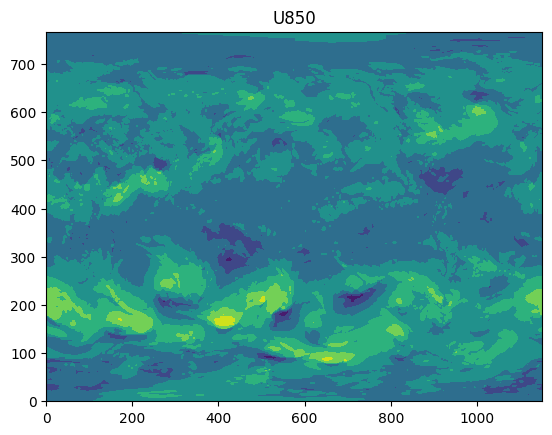

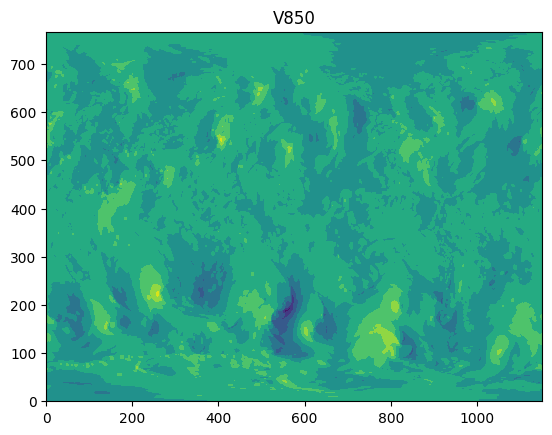

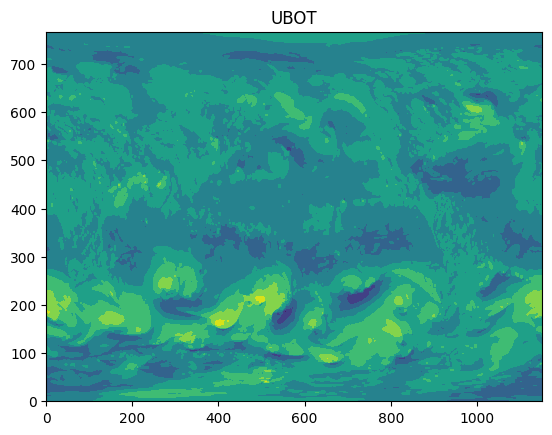

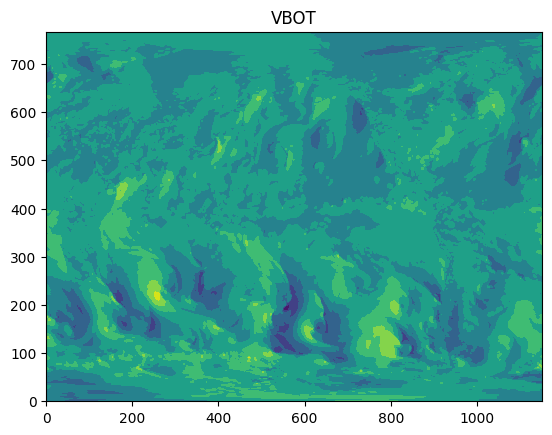

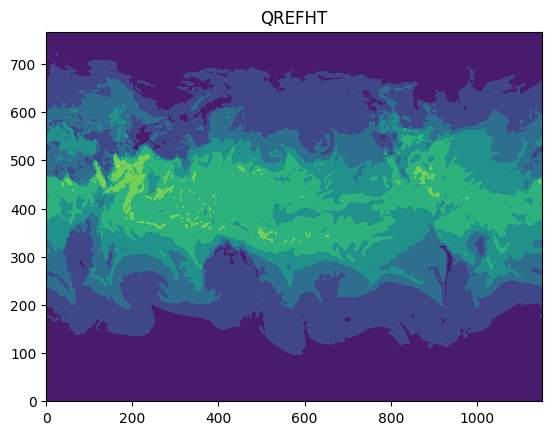

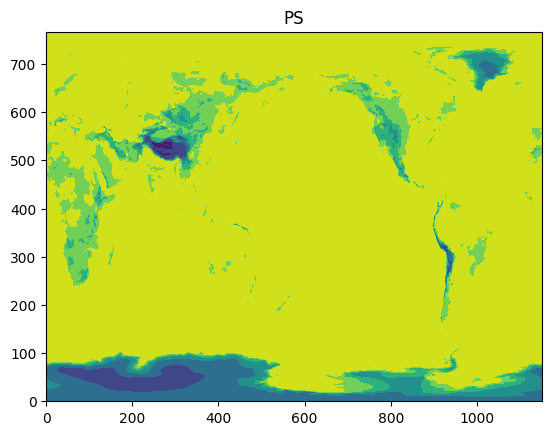

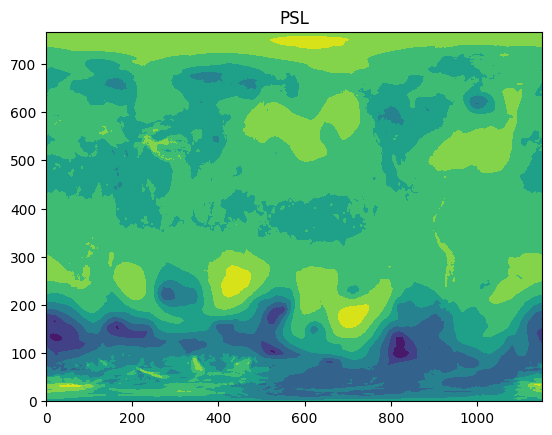

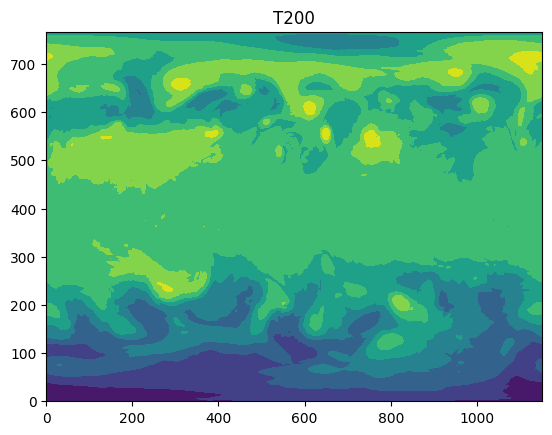

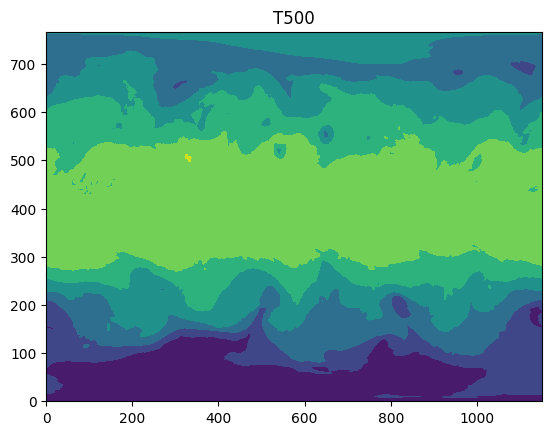

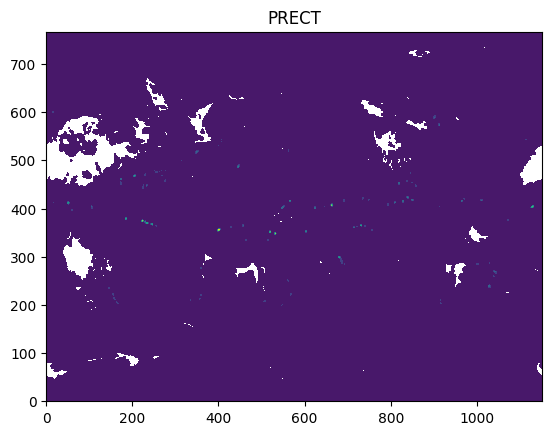

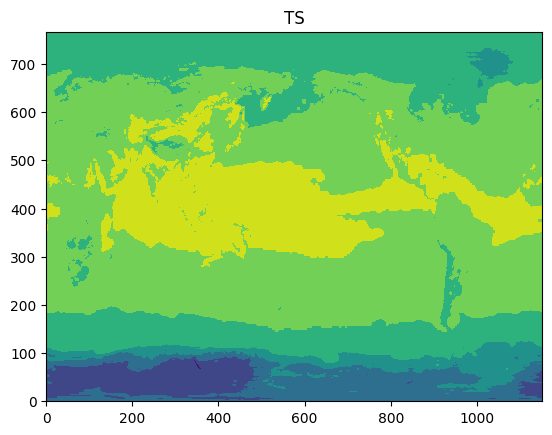

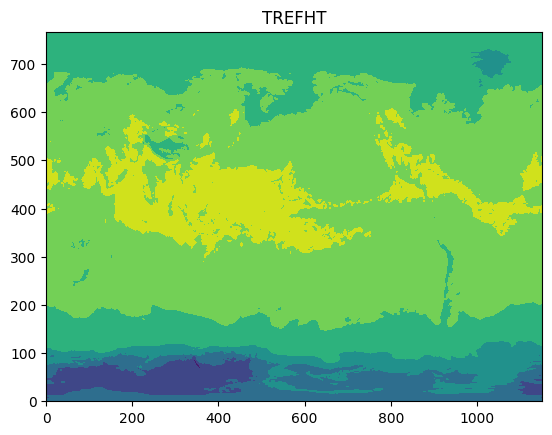

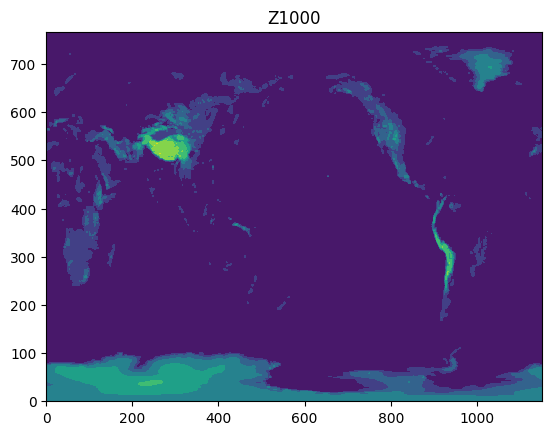

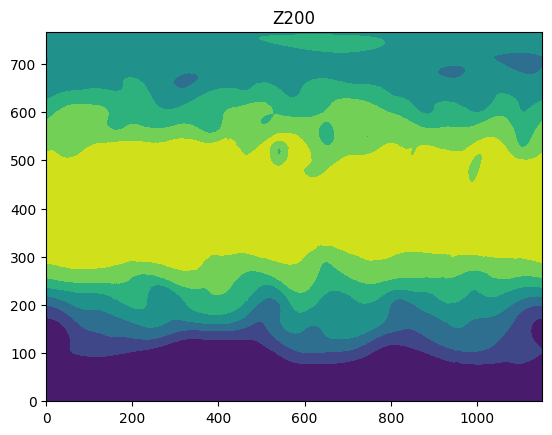

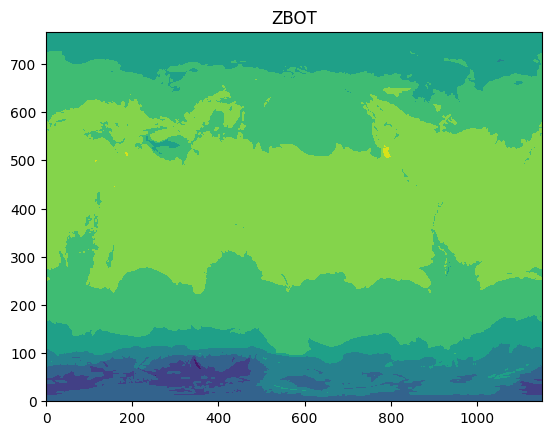

In [17]:
plt.contourf(list(data.variables['LABELS']))
plt.title('LABELS')
plt.show()
for key in ['TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS', 'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT']:
    plt.contourf(data.variables[key][0])
    plt.title(key)
    plt.show()

Interactively go trough training data

In [29]:
train_path = '../data/train'
def plot_labels(file):
    data = netCDF4.Dataset(os.path.join(train_path,file))
    cs = plt.contourf(list(data.variables['LABELS']),levels=[0,0.5,1.5,2])
    proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
             for pc in cs.collections]
    plt.legend(proxy, ["Background", "TC", "AR"])
    plt.title('LABELS')
    plt.show()

def f(file_idx, files):
    file = files[file_idx]
    date = '-'.join(file.split('-')[1:-2])
    mystery = file.split('-')[-1].split('.')[0]
    print(f'Date: {date}\nUnknown Info: {mystery}')
    plot_labels(file)
    
def visualizer():
    files = os.listdir(train_path)
    files.sort()
    interact(f, files=fixed(files), file_idx=widgets.IntSlider(min=0, max=len(files)-1, step=1, value=0))

In [30]:
visualizer()

interactive(children=(IntSlider(value=0, description='file_idx', max=397), Output()), _dom_classes=('widget-in…